In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from tensorflow.python.keras import backend as k
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten,Dense,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
img_width,img_height = 150,150

In [3]:
train_data_dir = '/content/drive/My Drive/filpkart agumented image/train'
validation_data_dir = '/content/drive/My Drive/filpkart agumented image/validation'
nb_train_samples = 960
nb_validation_samples = 40
epochs =20
batch_size =10

In [4]:
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
train_datagen = ImageDataGenerator(
     rescale=1. / 255,
     shear_range=0.2,
     zoom_range=0.2, vertical_flip=True)

In [6]:
test_datagen= ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 960 images belonging to 2 classes.


In [8]:
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 40 images belonging to 2 classes.


#1. Using SGD with Momentum Optimizer

In [9]:
from keras.optimizers import SGD

In [10]:

model_SGD = Sequential()
model_SGD.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_SGD.add(Activation('relu'))
model_SGD.add(MaxPooling2D(pool_size=(2, 2)))



model_SGD.add(Conv2D(32, (3, 3)))
model_SGD.add(Activation('relu'))
model_SGD.add(MaxPooling2D(pool_size=(2, 2)))

model_SGD.add(Conv2D(64, (3, 3)))
model_SGD.add(Activation('relu'))
model_SGD.add(MaxPooling2D(pool_size=(2, 2)))

model_SGD.add(Flatten())
model_SGD.add(Dense(64))
model_SGD.add(Activation('relu'))
model_SGD.add(Dropout(0.5))
model_SGD.add(Dense(1))
model_SGD.add(Activation('sigmoid'))

model_SGD.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.01,momentum=0.9),metrics=['accuracy'])

model_SGD.summary()

chkpt_SGD = ModelCheckpoint(r"/content/drive/My Drive/Colab Notebooks/flipkartcheckpoint.h5", 
                    monitor='val_loss', verbose=1, save_best_only=True,mode='min')

erlystp_SGD = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True, mode='min')

reducelr_SGD = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

callbk_SGD=[chkpt_SGD,erlystp_SGD,reducelr_SGD]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [11]:
history_SGD=model_SGD.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                    validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=callbk_SGD)

Epoch 1/20
96/96 [==============================] - 320s 3s/step - loss: 0.6975 - accuracy: 0.5042 - val_loss: 0.6781 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.67807, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint.h5
Epoch 2/20
96/96 [==============================] - 31s 322ms/step - loss: 0.6930 - accuracy: 0.5031 - val_loss: 0.6905 - val_accuracy: 0.4750

Epoch 00002: val_loss did not improve from 0.67807
Epoch 3/20
96/96 [==============================] - 31s 322ms/step - loss: 0.6909 - accuracy: 0.5448 - val_loss: 0.6968 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.67807

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 4/20
96/96 [==============================] - 31s 321ms/step - loss: 0.6946 - accuracy: 0.5365 - val_loss: 0.6943 - val_accuracy: 0.5500

Epoch 00004: val_loss did not improve from 0.67807
Epoch 5/20
96/96 [==============================] - 31s 327ms/

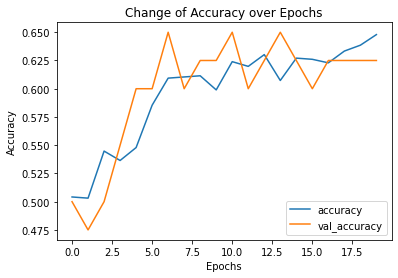

In [12]:
plt.plot(history_SGD.history['accuracy'])
plt.plot(history_SGD.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

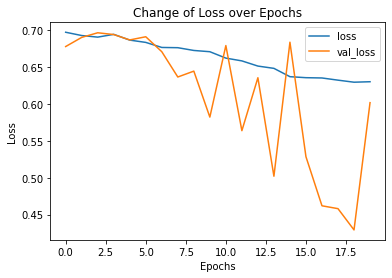

In [13]:
plt.plot(history_SGD.history['loss'])
plt.plot(history_SGD.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

#2. Using Nesterov Accelerated Gradient Descent Optimizer

In [14]:
model_Nesterov = Sequential()
model_Nesterov.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_Nesterov.add(Activation('relu'))
model_Nesterov.add(MaxPooling2D(pool_size=(2, 2)))



model_Nesterov.add(Conv2D(32, (3, 3)))
model_Nesterov.add(Activation('relu'))
model_Nesterov.add(MaxPooling2D(pool_size=(2, 2)))

model_Nesterov.add(Conv2D(64, (3, 3)))
model_Nesterov.add(Activation('relu'))
model_Nesterov.add(MaxPooling2D(pool_size=(2, 2)))

model_Nesterov.add(Flatten())
model_Nesterov.add(Dense(64))
model_Nesterov.add(Activation('relu'))
model_Nesterov.add(Dropout(0.5))
model_Nesterov.add(Dense(1))
model_Nesterov.add(Activation('sigmoid'))

model_Nesterov.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=0.01, nesterov=True),metrics=['accuracy'])

model_Nesterov.summary()

chkpt_Nesterov = ModelCheckpoint(r"/content/drive/My Drive/Colab Notebooks/flipkartcheckpoint1.h5", 
                    monitor='val_loss', verbose=1, save_best_only=True,mode='min')

erlystp_Nesterov = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True, mode='min')

reducelr_Nesterov = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', min_delta=0.0001)

callbk_Nesterov=[chkpt_Nesterov,erlystp_Nesterov,reducelr_Nesterov]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [15]:
history_Nesterov=model_Nesterov.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                    validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=callbk_Nesterov)

Epoch 1/20
96/96 [==============================] - 32s 336ms/step - loss: 0.6990 - accuracy: 0.5042 - val_loss: 0.6819 - val_accuracy: 0.6000

Epoch 00001: val_loss improved from inf to 0.68190, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint1.h5
Epoch 2/20
96/96 [==============================] - 32s 329ms/step - loss: 0.6901 - accuracy: 0.5385 - val_loss: 0.6759 - val_accuracy: 0.7250

Epoch 00002: val_loss improved from 0.68190 to 0.67589, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint1.h5
Epoch 3/20
96/96 [==============================] - 32s 328ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.7250

Epoch 00003: val_loss did not improve from 0.67589
Epoch 4/20
96/96 [==============================] - 32s 331ms/step - loss: 0.6774 - accuracy: 0.5885 - val_loss: 0.6714 - val_accuracy: 0.7000

Epoch 00004: val_loss improved from 0.67589 to 0.67141, saving model to /content/drive/My Drive/Colab Noteb

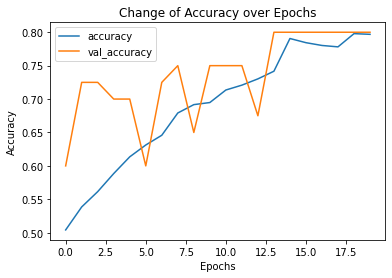

In [16]:
plt.plot(history_Nesterov.history['accuracy'])
plt.plot(history_Nesterov.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

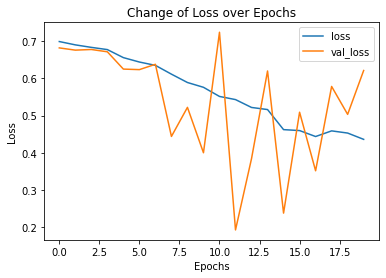

In [17]:
plt.plot(history_Nesterov.history['loss'])
plt.plot(history_Nesterov.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

In [18]:
#3. Using RMSprop optimizer

#3. Using RMSprop optimizer

In [19]:
model_RMSp = Sequential()
model_RMSp.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_RMSp.add(Activation('relu'))
model_RMSp.add(MaxPooling2D(pool_size=(2, 2)))



model_RMSp.add(Conv2D(32, (3, 3)))
model_RMSp.add(Activation('relu'))
model_RMSp.add(MaxPooling2D(pool_size=(2, 2)))

model_RMSp.add(Conv2D(64, (3, 3)))
model_RMSp.add(Activation('relu'))
model_RMSp.add(MaxPooling2D(pool_size=(2, 2)))

model_RMSp.add(Flatten())
model_RMSp.add(Dense(64))
model_RMSp.add(Activation('relu'))
model_RMSp.add(Dropout(0.5))
model_RMSp.add(Dense(1))
model_RMSp.add(Activation('sigmoid'))

model_RMSp.compile(loss='binary_crossentropy',optimizer =keras.optimizers.RMSprop(),metrics=['accuracy'],)

model_RMSp.summary()

chkpt_RMSp = ModelCheckpoint(r"/content/drive/My Drive/Colab Notebooks/flipkartcheckpoint2.h5", 
                    monitor='val_loss', verbose=1, save_best_only=True,mode='min')

erlystp_RMSp = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True, mode='min')

reducelr_RMSp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', min_delta=0.0001)

callbk_RMSp=[chkpt_RMSp,erlystp_RMSp,reducelr_RMSp]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)       

In [20]:
history_RMSp=model_RMSp.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                    validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=callbk_RMSp,)

Epoch 1/20
96/96 [==============================] - 32s 335ms/step - loss: 0.8206 - accuracy: 0.5271 - val_loss: 0.6027 - val_accuracy: 0.6750

Epoch 00001: val_loss improved from inf to 0.60266, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint2.h5
Epoch 2/20
96/96 [==============================] - 32s 334ms/step - loss: 0.6292 - accuracy: 0.6708 - val_loss: 0.4098 - val_accuracy: 0.9500

Epoch 00002: val_loss improved from 0.60266 to 0.40977, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint2.h5
Epoch 3/20
96/96 [==============================] - 32s 331ms/step - loss: 0.5864 - accuracy: 0.7104 - val_loss: 0.2406 - val_accuracy: 0.9250

Epoch 00003: val_loss improved from 0.40977 to 0.24058, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint2.h5
Epoch 4/20
96/96 [==============================] - 32s 335ms/step - loss: 0.5337 - accuracy: 0.7656 - val_loss: 0.1968 - val_accuracy: 0.9000

Epoch 00004: val_loss i

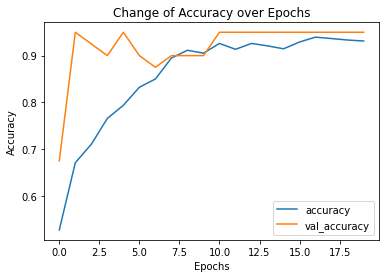

In [21]:
plt.plot(history_RMSp.history['accuracy'])
plt.plot(history_RMSp.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

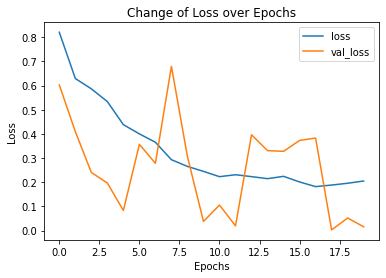

In [22]:
plt.plot(history_RMSp.history['loss'])
plt.plot(history_RMSp.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

# 4.Using Adam optimizer

In [23]:
model_Adam = Sequential()
model_Adam.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_Adam.add(Activation('relu'))
model_Adam.add(MaxPooling2D(pool_size=(2, 2)))



model_Adam.add(Conv2D(32, (3, 3)))
model_Adam.add(Activation('relu'))
model_Adam.add(MaxPooling2D(pool_size=(2, 2)))

model_Adam.add(Conv2D(64, (3, 3)))
model_Adam.add(Activation('relu'))
model_Adam.add(MaxPooling2D(pool_size=(2, 2)))

model_Adam.add(Flatten())
model_Adam.add(Dense(64))
model_Adam.add(Activation('relu'))
model_Adam.add(Dropout(0.5))
model_Adam.add(Dense(1))
model_Adam.add(Activation('sigmoid'))

model_Adam.compile(loss='binary_crossentropy',optimizer =keras.optimizers.Adam(lr=0.001),metrics=['accuracy'],)

model_Adam.summary()

chkpt_Adam = ModelCheckpoint(r"/content/drive/My Drive/Colab Notebooks/flipkartcheckpoint3.h5", 
                    monitor='val_loss', verbose=1, save_best_only=True,mode='min')

erlystp_Adam = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True, mode='min')

reducelr_Adam = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', min_delta=0.0001)

callbk_Adam=[chkpt_Adam,erlystp_Adam,reducelr_Adam]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)       

In [24]:
history_Adam=model_Adam.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                    validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=callbk_Adam)

Epoch 1/20
96/96 [==============================] - 33s 339ms/step - loss: 0.6950 - accuracy: 0.4958 - val_loss: 0.6524 - val_accuracy: 0.6750

Epoch 00001: val_loss improved from inf to 0.65239, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint3.h5
Epoch 2/20
96/96 [==============================] - 32s 332ms/step - loss: 0.6663 - accuracy: 0.5844 - val_loss: 0.4922 - val_accuracy: 0.7000

Epoch 00002: val_loss improved from 0.65239 to 0.49221, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint3.h5
Epoch 3/20
96/96 [==============================] - 32s 333ms/step - loss: 0.5999 - accuracy: 0.6698 - val_loss: 0.4874 - val_accuracy: 0.7000

Epoch 00003: val_loss improved from 0.49221 to 0.48739, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint3.h5
Epoch 4/20
96/96 [==============================] - 32s 336ms/step - loss: 0.5519 - accuracy: 0.6948 - val_loss: 0.5535 - val_accuracy: 0.8000

Epoch 00004: val_loss d

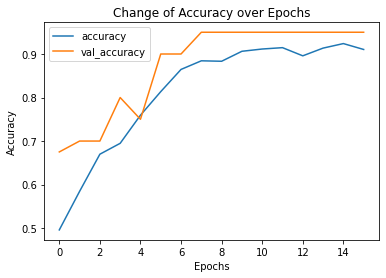

In [25]:
plt.plot(history_Adam.history['accuracy'])
plt.plot(history_Adam.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

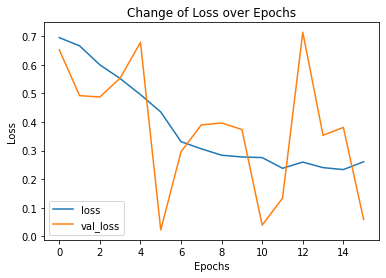

In [26]:
plt.plot(history_Adam.history['loss'])
plt.plot(history_Adam.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

#4.1 Using Adam optimizer with change in learning rate

In [27]:
model_Adamlr = Sequential()
model_Adamlr.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_Adamlr.add(Activation('relu'))
model_Adamlr.add(MaxPooling2D(pool_size=(2, 2)))



model_Adamlr.add(Conv2D(32, (3, 3)))
model_Adamlr.add(Activation('relu'))
model_Adamlr.add(MaxPooling2D(pool_size=(2, 2)))

model_Adamlr.add(Conv2D(64, (3, 3)))
model_Adamlr.add(Activation('relu'))
model_Adamlr.add(MaxPooling2D(pool_size=(2, 2)))

model_Adamlr.add(Flatten())
model_Adamlr.add(Dense(64))
model_Adamlr.add(Activation('relu'))
model_Adamlr.add(Dropout(0.5))
model_Adamlr.add(Dense(1))
model_Adamlr.add(Activation('sigmoid'))

model_Adamlr.compile(loss='binary_crossentropy',optimizer =keras.optimizers.Adam(lr=0.005),metrics=['accuracy'],)

model_Adamlr.summary()

chkpt_Adamlr = ModelCheckpoint(r"/content/drive/My Drive/Colab Notebooks/flipkartcheckpointlr3.h5", 
                    monitor='val_loss', verbose=1, save_best_only=True,mode='min')

erlystp_Adamlr = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True, mode='min')

reducelr_Adamlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', min_delta=0.0001)

callbk_Adamlr=[chkpt_Adamlr,erlystp_Adamlr,reducelr_Adamlr]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)       

In [28]:
history_Adamlr=model_Adamlr.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                    validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=callbk_Adamlr)

Epoch 1/20
96/96 [==============================] - 32s 337ms/step - loss: 0.7967 - accuracy: 0.5104 - val_loss: 0.6880 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.68799, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpointlr3.h5
Epoch 2/20
96/96 [==============================] - 32s 328ms/step - loss: 0.7000 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.68799
Epoch 3/20
96/96 [==============================] - 31s 328ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6930 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.68799

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 4/20
96/96 [==============================] - 32s 328ms/step - loss: 0.6933 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.68799
Epoch 5/20
96/96 [==============================] - 32s 3

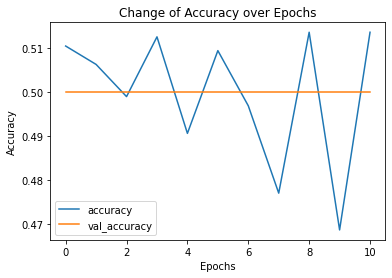

In [29]:
plt.plot(history_Adamlr.history['accuracy'])
plt.plot(history_Adamlr.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

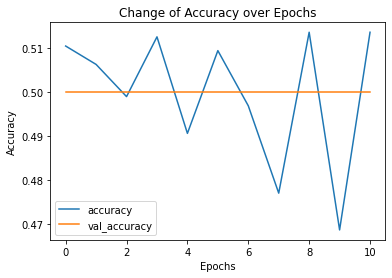

In [30]:
plt.plot(history_Adamlr.history['accuracy'])
plt.plot(history_Adamlr.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

#5. Using Nadam optimizer

In [31]:
model_Nadam = Sequential()
model_Nadam.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_Nadam.add(Activation('relu'))
model_Nadam.add(MaxPooling2D(pool_size=(2, 2)))



model_Nadam.add(Conv2D(32, (3, 3)))
model_Nadam.add(Activation('relu'))
model_Nadam.add(MaxPooling2D(pool_size=(2, 2)))

model_Nadam.add(Conv2D(64, (3, 3)))
model_Nadam.add(Activation('relu'))
model_Nadam.add(MaxPooling2D(pool_size=(2, 2)))

model_Nadam.add(Flatten())
model_Nadam.add(Dense(64))
model_Nadam.add(Activation('relu'))
model_Nadam.add(Dropout(0.5))
model_Nadam.add(Dense(1))
model_Nadam.add(Activation('sigmoid'))

model_Nadam.compile(loss='binary_crossentropy',optimizer =keras.optimizers.Nadam(lr=0.001),metrics=['accuracy'],)

model_Nadam.summary()

chkpt_Nadam = ModelCheckpoint(r"/content/drive/My Drive/Colab Notebooks/flipkartcheckpoint4.h5", 
                    monitor='val_loss', verbose=1, save_best_only=True,mode='min')

erlystp_Nadam = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True, mode='min')

reducelr_Nadam = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', min_delta=0.0001)

callbk_Nadam=[chkpt_Nadam,erlystp_Nadam,reducelr_Nadam]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_26 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_27 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)       

In [32]:
history_Nadam=model_Nadam.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                    validation_data=validation_generator,validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=callbk_Nadam)

Epoch 1/20
96/96 [==============================] - 33s 343ms/step - loss: 0.7167 - accuracy: 0.5219 - val_loss: 0.6734 - val_accuracy: 0.7750

Epoch 00001: val_loss improved from inf to 0.67344, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint4.h5
Epoch 2/20
96/96 [==============================] - 32s 337ms/step - loss: 0.6717 - accuracy: 0.5844 - val_loss: 0.3438 - val_accuracy: 0.6500

Epoch 00002: val_loss improved from 0.67344 to 0.34382, saving model to /content/drive/My Drive/Colab Notebooks/flipkartcheckpoint4.h5
Epoch 3/20
96/96 [==============================] - 32s 336ms/step - loss: 0.6181 - accuracy: 0.6656 - val_loss: 0.4020 - val_accuracy: 0.6250

Epoch 00003: val_loss did not improve from 0.34382
Epoch 4/20
96/96 [==============================] - 32s 336ms/step - loss: 0.5791 - accuracy: 0.6729 - val_loss: 0.4719 - val_accuracy: 0.7750

Epoch 00004: val_loss did not improve from 0.34382

Epoch 00004: ReduceLROnPlateau reducing learning rate t

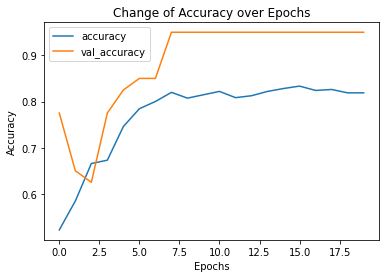

In [33]:
plt.plot(history_Nadam.history['accuracy'])
plt.plot(history_Nadam.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

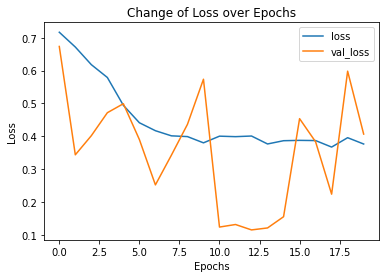

In [34]:
plt.plot(history_Nadam.history['loss'])
plt.plot(history_Nadam.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

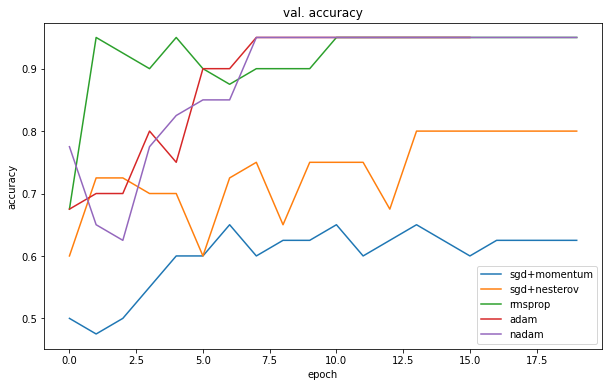

In [35]:
plt.figure(figsize=(10, 6))


plt.plot(history_SGD.history['val_accuracy'],'')

plt.plot(history_Nesterov.history['val_accuracy'],'')
plt.plot(history_RMSp.history['val_accuracy'])
plt.plot(history_Adam.history['val_accuracy'])
plt.plot(history_Nadam.history['val_accuracy'], '')

plt.title('val. accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['sgd+momentum','sgd+nesterov','rmsprop', 'adam', 'nadam'], loc='lower right')

plt.show()

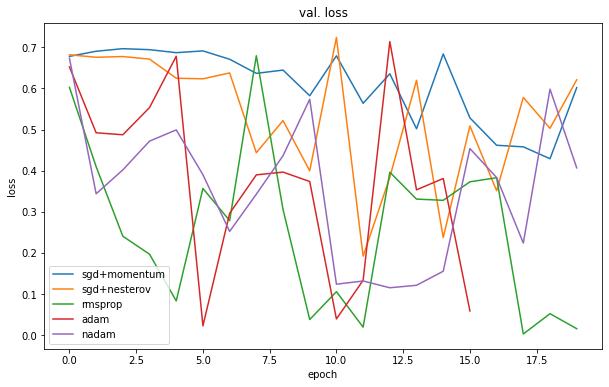

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history_SGD.history['val_loss'])
plt.plot(history_Nesterov.history['val_loss'])
plt.plot(history_RMSp.history['val_loss']) 
plt.plot(history_Adam.history['val_loss'])
plt.plot(history_Nadam.history['val_loss'])

plt.title('val. loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['sgd+momentum','sgd+nesterov','rmsprop', 'adam', 'nadam'], loc='lower left') 
plt.show()

In [39]:
train_generator.class_indices

{'Trouser': 0, 'jeans': 1}

In [41]:
model_Adam.save_weights('/content/drive/My Drive/Colab Notebooks/flipkartcheckpoint3.h5')

In [42]:
img_pred=image.load_img('/content/drive/My Drive/filpkart agumented image/test/img_320.jpeg', target_size=(150,150))

In [43]:
img_pred=np.expand_dims(img_pred,axis=0)

In [45]:
result=model_Adam.predict(img_pred)
print(result)
if result[0][0]==1:
  prediction="jeans"
else:
  prediction="Trouser"
print(prediction)


[[1.]]
jeans
